In [44]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import ndimage

In [45]:
nameP="AngiografiaR"
nameM="Inline"
nameV="58kVp"
nameF="FilterAl"
nameD="Dist3"
nameTP="PlaqueC"
nameDa="PData"
name0=nameP+"/"+nameM+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+nameDa+"/ThickP1.txt"
ThickA=np.genfromtxt(name0)
Npixeles=256
#xL=np.arange(0,Npixeles,27) #Dist1
#xL=np.arange(0,Npixeles,36) #Dist2
xL=np.arange(0,Npixeles,45) #Dist3
#xJ = np.multiply(xL,np.round(2/PDith,1))
labels=[int(i) for i in xL]
#JJ=-0.0058
JJ=-0.00000

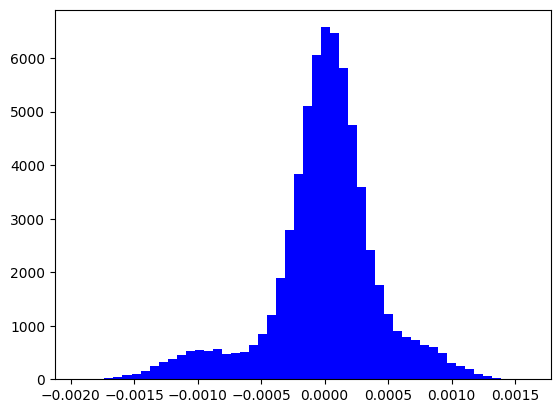

In [46]:
HistThickA=plt.hist(np.ravel(ThickA),bins=50,color="blue")

In [47]:
def PI(name,inicial,final,h,y):
    P=np.zeros(y-h)
    for i in range(inicial,final):
        P=P+name[i,h:y]
    mean=P/(final-inicial)
    return mean

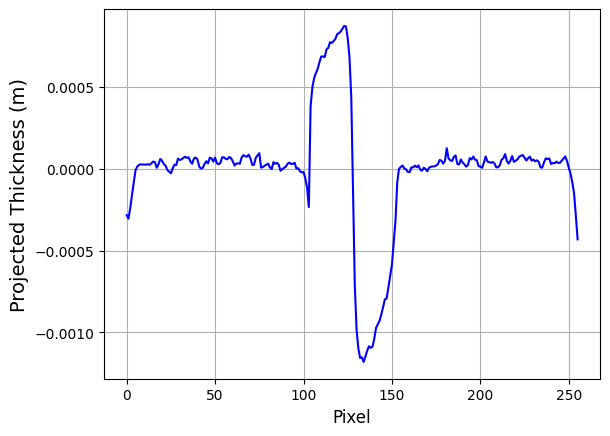

In [48]:
fig,ax=plt.subplots()
plt.plot(PI(ThickA+JJ,0,ThickA.shape[0],0,ThickA.shape[1]), color="blue",label="Beltran")
#plt.plot(TestEsC1,linestyle="--", color="green",linewidth = 1.5,label="Theoretical")
#plt.title("Projected Thickness profile\n Internal material",fontsize=15)
plt.ylabel("Projected Thickness (m)",fontsize=14)
plt.xlabel("Pixel",fontsize=12)
plt.grid()

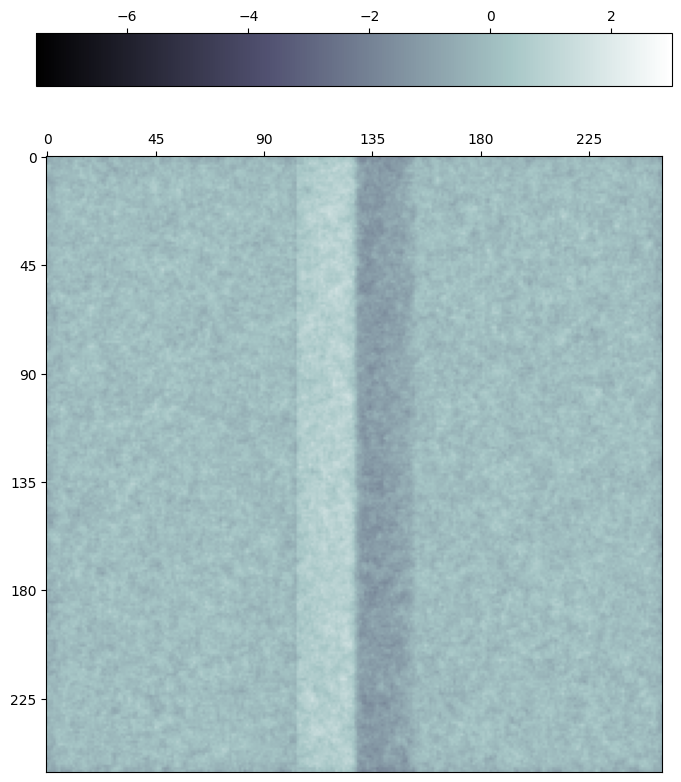

In [49]:
X1=95 #Dist1
X2=115
X3=119
X4=126
X5=130
X6=137
X7=141
X8=161
#X1=85 #Dist2
#X2=105
#X3=114
#X4=125
#X5=131
#X6=142
#X7=151
#X8=171
#X1=78 #Dist3
#X2=98
#X3=106
#X4=125
#X5=131
#X6=150
#X7=158
#X8=178
Y1=0
Y2=255
fig, ax = plt.subplots(figsize=(10, 10))
u=ax.imshow((ThickA+JJ)*1000, cmap="bone",vmin=-0.0075*1000,vmax=0.003*1000) #Dist1
#u=ax.imshow((ThickA+JJ)*1000, cmap="bone",vmin=-0.0021*1000,vmax=0.001*1000) #Dist2
#u=ax.imshow((ThickA+JJ)*1000, cmap="bone",vmin=-0.00088*1000,vmax=0.001*1000) #Dist3
plt.xticks(xL,labels)
plt.tick_params(axis='x', labeltop=True, labelbottom=False, top=True, bottom=False)
plt.yticks(xL,labels)
fig.colorbar(u,ax=ax,location='top', anchor=(0.5, 0.5), shrink=0.82,aspect=12)
#ax.vlines(x=X1, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=2)
#ax.vlines(x=X2, ymin=Y1, ymax=Y2,linestyle="--", color="red",linewidth=2)
#ax.vlines(x=X3, ymin=Y1, ymax=Y2,linestyle="--", color="gold",linewidth=2)
#ax.vlines(x=X4, ymin=Y1, ymax=Y2,linestyle="--", color="gold",linewidth=2)
#ax.vlines(x=X5, ymin=Y1, ymax=Y2,linestyle="--", color="green",linewidth=2)
#ax.vlines(x=X6, ymin=Y1, ymax=Y2,linestyle="--", color="green",linewidth=2)
#ax.vlines(x=X7, ymin=Y1, ymax=Y2,linestyle="--", color="blue",linewidth=2)
#ax.vlines(x=X8, ymin=Y1, ymax=Y2,linestyle="--", color="blue",linewidth=2)
plt.savefig(nameP+"/"+nameM+"/"+nameV+"/"+nameF+"/"+nameD+"/"+nameTP+"/"+nameDa+"/ImThickP1.png", bbox_inches='tight', transparent=True, pad_inches=0,dpi=199)

In [50]:
ThickmeanB=np.mean(np.concatenate((ThickA[:,X1:X2],ThickA[:,X7:X8]),1))
ThickmeanAir=np.mean(ThickA[:,X3:X4])
ThickmeanPlaque=np.mean(ThickA[:,X5:X6])
ThickdestB=np.std(np.concatenate((ThickA[:,X1:X2],ThickA[:,X7:X8]),1))
ThickdestAir=np.std(ThickA[:,X3:X4])
ThickdestPlaque=np.std(ThickA[:,X5:X6])
ThickCNRAir=(np.abs(ThickmeanAir-ThickmeanB))/ThickdestB
ThickCNRPlaque=(np.abs(ThickmeanPlaque-ThickmeanB))/ThickdestB
print("P.Thickness (Air) image/The mean Background is",format(ThickmeanB, ".1E"))
print("P.Thickness (Air) image/The mean Air is",format(ThickmeanAir, ".1E"))
print("P.Thickness (Air) image/The mean Plaque is",format(ThickmeanPlaque, ".1E"))
print("P.Thickness (Air) image/The desviation Background is",format(ThickdestB, ".1E"))
#print("P.Thickness (Air) image/The desviation PMMA is",np.round(PhdestPMMA,3))
#print("P.Thickness (Air) image/The desviation Air is",np.round(PhdestAir,3))
#print("P.Thickness (Air) image/The desviation Plaque is",np.round(PhdestPlaque,3))
print("P.Thickness (Air) image/The CNR Air is", np.round(ThickCNRAir,3))
print("P.Thickness (Air) image/The CNR Plaque is", np.round(ThickCNRPlaque,3))

P.Thickness (Air) image/The mean Background is -6.7E-05
P.Thickness (Air) image/The mean Air is 8.4E-04
P.Thickness (Air) image/The mean Plaque is -1.1E-03
P.Thickness (Air) image/The desviation Background is 5.8E-04
P.Thickness (Air) image/The CNR Air is 1.564
P.Thickness (Air) image/The CNR Plaque is 1.816
